# NB_140124T1609_linear_regression_pytorch

# 0.Goals


- implementation linear regression with pytorch

[link to torch tutorial](https://github.com/ilbaks/LLM_start/blob/main/02_Pytorch_Basics/02_pytorch_basics_regression.ipynb)

# 1.Imports

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
from typing import Union
import matplotlib.pyplot as plt

# 2. Implementation of the class LinearRegression

In [38]:
class LinearRegression(object):
    def __init__(self, learning_rate: float = 0.01, num_iter: int = 200):
        self.lr = learning_rate
        self.n_iter = num_iter
        self.model = None
        self.optimizer = None

    def initialize_model(self, input_size, output_size: int = 1):
        self.model = nn.Linear(
            in_features=input_size, out_features=output_size
        )

    def initialize_optim(self):
        self.loss_function = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.lr)

    def fit(
        self,
        X: Union[np.ndarray, torch.Tensor],
        Y: Union[np.ndarray, torch.Tensor],
    ):
        if isinstance(X, np.ndarray):
            X = torch.from_numpy(X.astype(np.float32))

        if isinstance(Y, np.ndarray):
            Y = torch.from_numpy(Y.astype(np.float32))

        Y = Y.view(Y.shape[0], 1)

        n_samples, n_features = X.size()

        self.initialize_model(input_size=n_features)
        self.initialize_optim()

        for _ in range(self.n_iter):
            # forward pass
            Y_hat = self.model(X)

            # compute loss
            loss = self.loss_function(Y_hat, Y)

            # backward pass
            loss.backward()

            # update the model parameters
            self.optimizer.step()

            # zero gradients
            self.optimizer.zero_grad()

            # print loss every 10 iters
            if _ % 10 == 0:
                print(f"epoch: {_ + 1}, {loss.item()=:.4f}")

    def predict(self, X: np.ndarray) -> np.ndarray:
        X_torch = torch.Tensor(X.astype(np.float32))

        Y_hat_torch = self.model(X_torch)

        Y_hat = Y_hat_torch.detach().numpy()

        return Y_hat

# 3.Load data

type(X_test)=<class 'numpy.ndarray'>, 
 type(Y_test)=<class 'numpy.ndarray'>, 
 X_test.shape=(20, 1), 
 Y_test.shape=(20,)


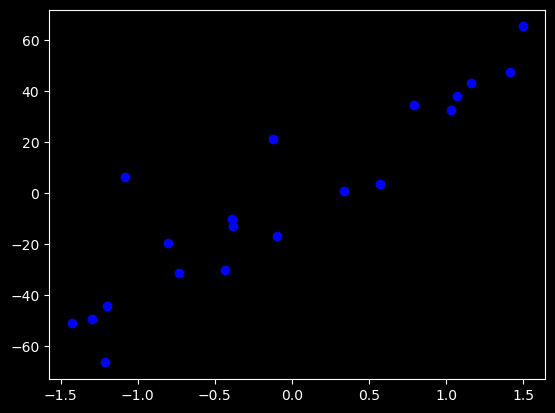

In [39]:
X, y = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=123
)


X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print(
    f"{type(X_test)=}, \n {type(Y_test)=}, \n {X_test.shape=}, \n {Y_test.shape=}"
)

plt.plot(X_test, Y_test, "o", color="blue")
plt.show()

# 4.Use the model

- fit the model

In [40]:
linear_regeressor = LinearRegression()

linear_regeressor.fit(X_test, Y_test)

epoch: 1, loss.item()=1294.1327
epoch: 11, loss.item()=959.9120
epoch: 21, loss.item()=730.0139
epoch: 31, loss.item()=571.7510
epoch: 41, loss.item()=462.7185
epoch: 51, loss.item()=387.5468
epoch: 61, loss.item()=335.6825
epoch: 71, loss.item()=299.8742
epoch: 81, loss.item()=275.1346
epoch: 91, loss.item()=258.0313
epoch: 101, loss.item()=246.1997
epoch: 111, loss.item()=238.0099
epoch: 121, loss.item()=232.3377
epoch: 131, loss.item()=228.4071
epoch: 141, loss.item()=225.6817
epoch: 151, loss.item()=223.7911
epoch: 161, loss.item()=222.4790
epoch: 171, loss.item()=221.5678
epoch: 181, loss.item()=220.9349
epoch: 191, loss.item()=220.4950


- predict with the model

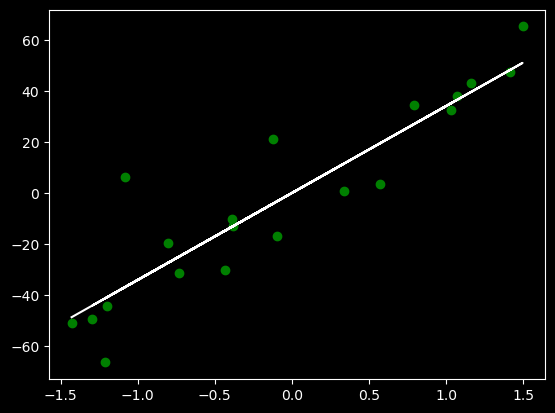

In [42]:
Y_hat = linear_regeressor.predict(X_test)

plt.plot(X_test, Y_test, "o", color="green")
plt.plot(X_test, Y_hat, color="white")
plt.show()